In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sb
from pylab import rcParams

import scipy 
from scipy.stats import spearmanr

In [3]:
%matplotlib inline
rcParams['figure.figsize']=14,7
plt.style.use('seaborn-whitegrid')

# The Spearman Rank Correlation

Spearman's correlation assumes:
- your varaibles are ordinal; numeric,but able to be ranked like a categorical variable
- yourvariables are relatid nonlinearly
- you data is non-normally distributed

In [5]:
cars = pd.read_csv('mtcars.csv')

In [7]:
cars.columns = ['car_names', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs',
       'am', 'gear', 'carb']

In [8]:
cars.head(10)

,car_names,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


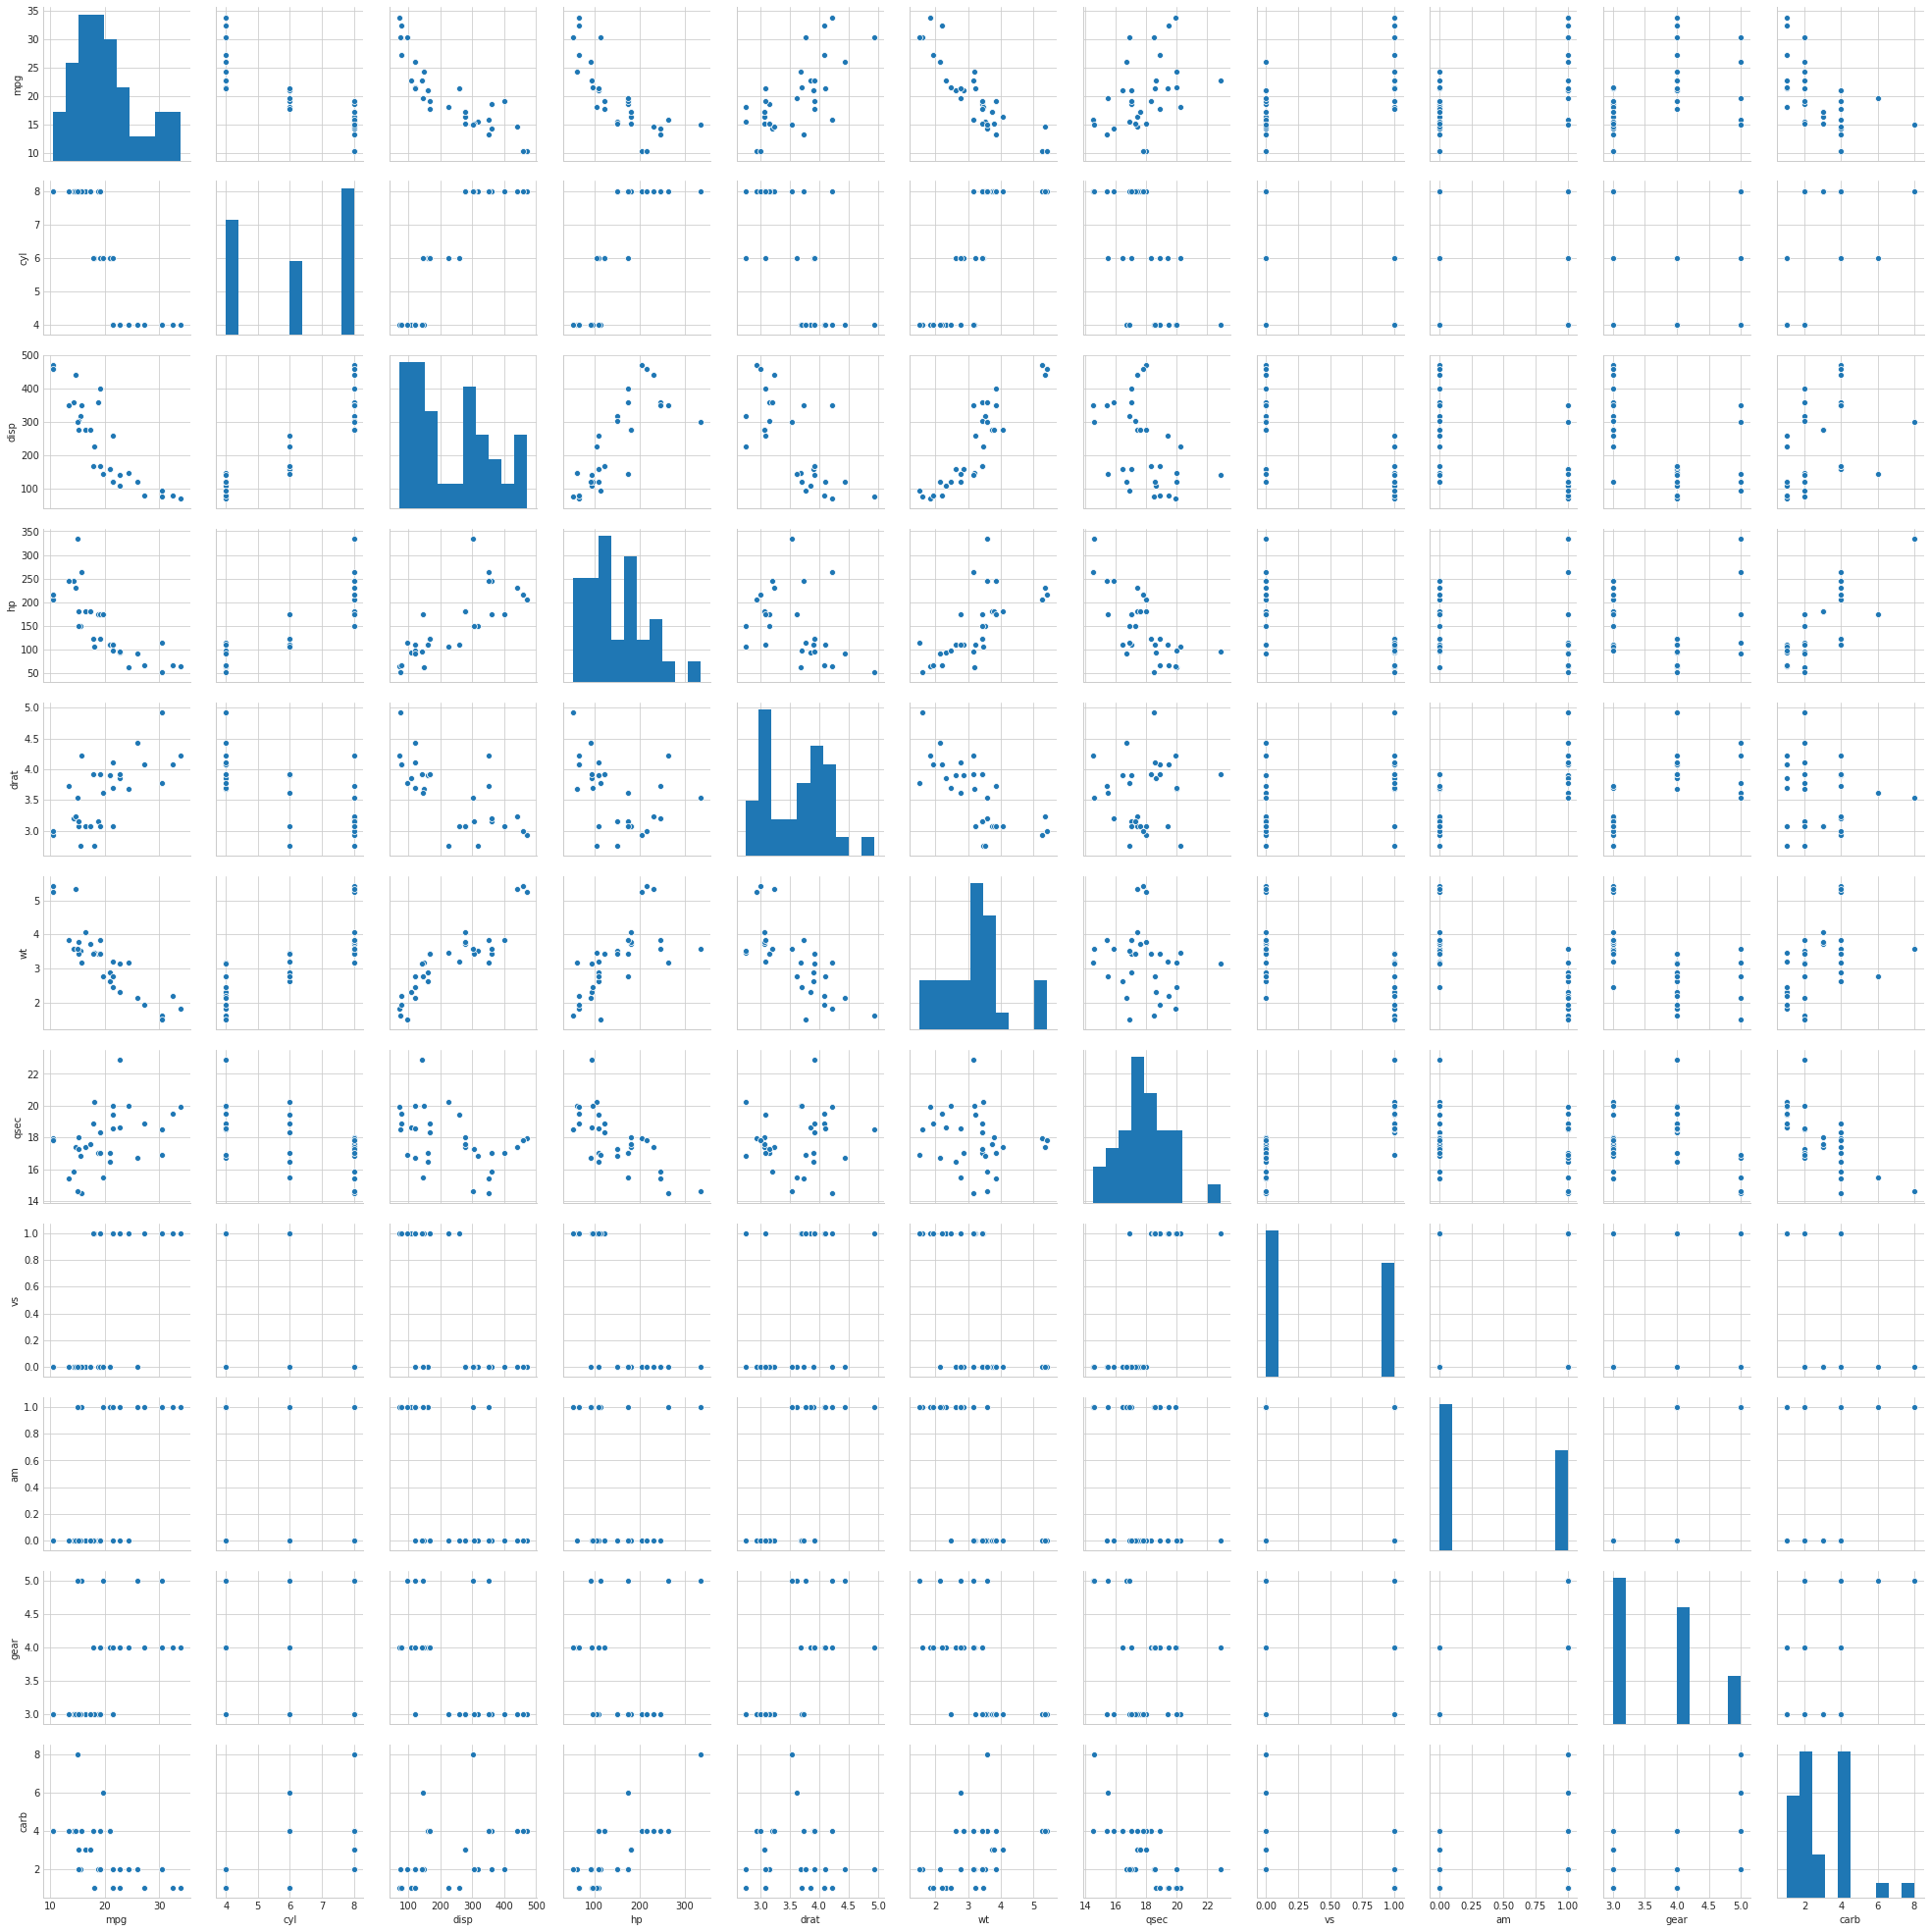

In [9]:
sb.pairplot(cars)

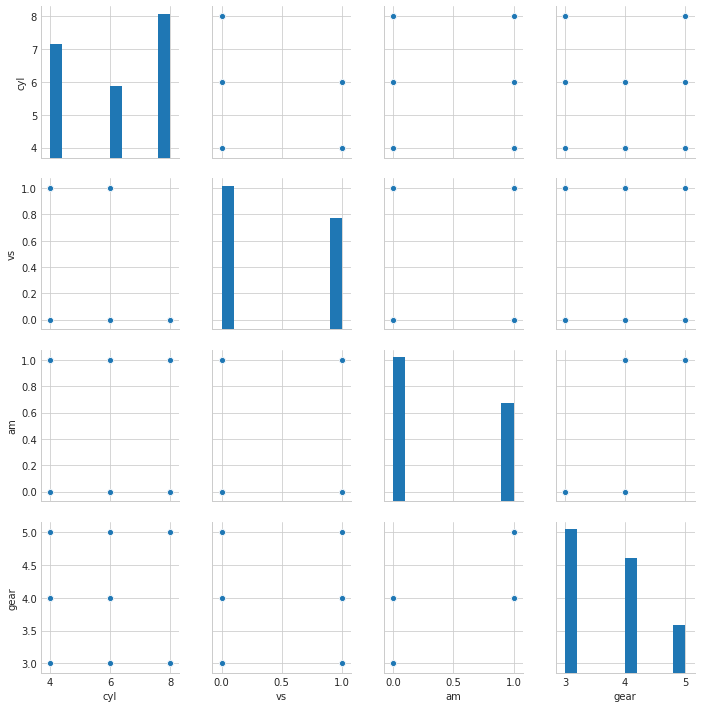

In [11]:
x =cars[['cyl','vs','am','gear']]
sb.pairplot(x)

In [12]:
cyl = cars['cyl']
vs = cars['vs']
am = cars['am']
gear = cars['gear']

spearmanr_coefficient, p_value = spearmanr(cyl,vs)
print('Spearmen Rank Correlation Coefficient %0.3f' % (spearmanr_coefficient))

Spearmen Rank Correlation Coefficient -0.814


In [13]:
spearmanr_coefficient, p_value = spearmanr(cyl,vs)
print('Spearmen P_value %0.3f' % (p_value))

Spearmen P_value 0.000


In [24]:
print('sum:3+1= %0.f'%(3+1))

sum:3+1= 4


In [23]:
print('sum:3+1= %0.1F'%(3+1))

sum:3+1= 4.0


In [25]:
spearmanr_coefficient, p_value = spearmanr(cyl,am)
print('Spearman Rank Corelation coeeficeint %0.3f'%(spearmanr_coefficient))

Spearman Rank Corelation coeeficeint -0.522


In [27]:
spearmanr_coefficient, p_value = spearmanr(cyl,gear)
print('Spearman Rank Corelation Coefficient %0.3f'%(spearmanr_coefficient))

Spearman Rank Corelation Coefficient -0.564


# Chi-square test for independece

Chi-square is a test for independence to determine if nonlinear variables are independent of one other

The null hypothesis: two variables are independent
- p<0.05 Reject null hypothesis and conclude that the variables are correlated
- p>0.05 accept null hypothesis and conclude that the variables are independent

In [28]:
table = pd.crosstab(cyl,am)

from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(table.values)
print('Chi-square statistic %0.3f p_value%0.3f'% (chi2,p))

Chi-square statistic 8.741 p_value0.013


In [29]:
########################################
table.values

array([[ 3,  8],
       [ 4,  3],
       [12,  2]])

In [30]:
chi2_contingency(table.values)

(8.740732951259268, 0.012646605046107276, 2, array([[6.53125, 4.46875],
        [4.15625, 2.84375],
        [8.3125 , 5.6875 ]]))

In [31]:
print('Chi-square expected 0.3f'% (expected))

Chi-square expected 0.3f


In [32]:
print('Chi-square dof 0.3f'% (dof))

TypeError: not all arguments converted during string formatting

In [35]:
table = pd.crosstab(cyl,vs)
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(table.values)
print('Chi-square statistic %0.3f p_value%0.3f'% (chi2,p))

Chi-square statistic 21.340 p_value0.000


In [41]:
table = pd.crosstab(cyl,gear)
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(table.values)
print('Chi-square statistic:%0.3f, p_value:%0.3f'% (chi2,p))

Chi-square statistic:18.036, p_value:0.001
